# 20년 멜론차트 top30노래 가사 정보데이터 시각화

## 1.패키지 설치 및 임포트

In [1]:
!pip install koreanize-matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.1 MB/s eta 0:00:00


In [2]:
import pandas as pd

from collections import Counter
import re


from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 2.데이터 준비


In [3]:
df = pd.read_csv('/content/멜론 2020년 TOP30_20250709.csv')
df.head()

,노래제목,가수,가사
0,아무노래,지코 (ZICO),왜들 그리 다운돼있어 뭐가 문제야 say something 분위기가 겁나 싸해 요...
1,METEOR,창모 (CHANGMO),Yeah ha Yeah ha Yeah ha Yeah ha Yeah ha Yeah ...
2,아로하,조정석,어두운 불빛아래 촛불 하나 와인 잔에 담긴 약속하나 항상 너의 곁에서 널 지켜줄거...
3,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야 스쳐지나간건가 뒤돌아보지만 그냥 사람...
4,에잇(Prod.&Feat. SUGA of BTS),아이유,So are you happy now Finally happy now are yo...


In [4]:
# 30위까지 가사에서 가장 많이 사용되는 단어는?

#1 가사컬럼만 문자열 합치기
all_lyrics=' '.join(df['가사'])

#2 단어 추출
## 가사 뭉치에서 단어를 추출하고, 단어의 빈도를 계산(영어포함)
###정규식을 이용해서 단어를 추출
####\b:'워드 바운더리' 단어의 시작과 끝이 있는 문자로 매칭
####\w:워드만 추출하도록 하고, 알파벳,한글,숫자까지 모두 포함
words=re.findall(r'\b\w+\b',all_lyrics.lower())   #lower소문자변환

#3 불용어 처리
stopwords=['은','는','이','가','으로','에','그','a','the','i']
## 함수
def remove_stopwords (words):
  return [w for w in words if w not in stopwords]
words =remove_stopwords(words)

## 3.단어빈도표 만들기

In [5]:
#단어의 빈도가 가장 높은 상위 20개의 단어와 수를 추출
word_freq =Counter(words)
word_freq.most_common()  #가장 많은 빈도를 튜플로 알려줌(고정됨)

top_words=[word for word, freq in word_freq.most_common(10)]
top_freq=[freq for word, freq in word_freq.most_common(10)]
word_freq.most_common()

[('da', 112),
 ('you', 82),
 ('my', 64),
 ('oh', 60),
 ('ah', 60),
 ('hip', 60),
 ('널', 59),
 ('내', 58),
 ('me', 51),
 ('난', 47),
 ('yeah', 42),
 ('너를', 37),
 ('that', 37),
 ('like', 37),
 ('it', 34),
 ('up', 34),
 ('na', 32),
 ('다', 31),
 ('내가', 30),
 ('now', 30),
 ('m', 29),
 ('look', 29),
 ('수', 28),
 ('and', 26),
 ('한', 26),
 ('at', 26),
 ('또', 25),
 ('s', 24),
 ('너의', 24),
 ('날', 24),
 ('다시', 23),
 ('아무', 22),
 ('이렇게', 22),
 ('나', 22),
 ('나의', 22),
 ('더', 21),
 ('해', 21),
 ('be', 21),
 ('so', 20),
 ('bring', 20),
 ('t', 19),
 ('hey', 19),
 ('게', 18),
 ('is', 18),
 ('모든', 18),
 ('with', 18),
 ('eh', 18),
 ('않아', 17),
 ('ll', 17),
 ('do', 16),
 ('안', 16),
 ('우리', 16),
 ('싶어', 16),
 ('넌', 16),
 ('nonstop', 16),
 ('위한', 15),
 ('네', 15),
 ('지금', 15),
 ('없어', 15),
 ('we', 15),
 ('can', 15),
 ('baby', 15),
 ('너와', 15),
 ('ha', 14),
 ('life', 14),
 ('걸', 14),
 ('how', 14),
 ('light', 13),
 ('나를', 13),
 ('어떤', 13),
 ('네가', 13),
 ('내게', 13),
 ('너', 13),
 ('psycho', 13),
 ('need', 13),
 ('살짝

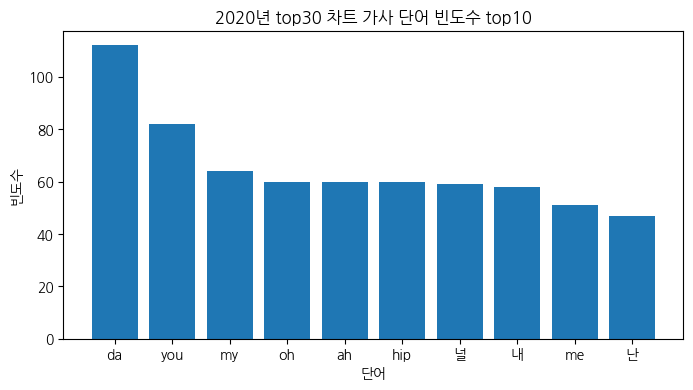

In [6]:
# ver1.막대 그래프로 빈도 차트 그리기
plt.figure(figsize=(8,4))
plt.bar(top_words,top_freq)
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('2020년 top30 차트 가사 단어 빈도수 top10')
plt.show()

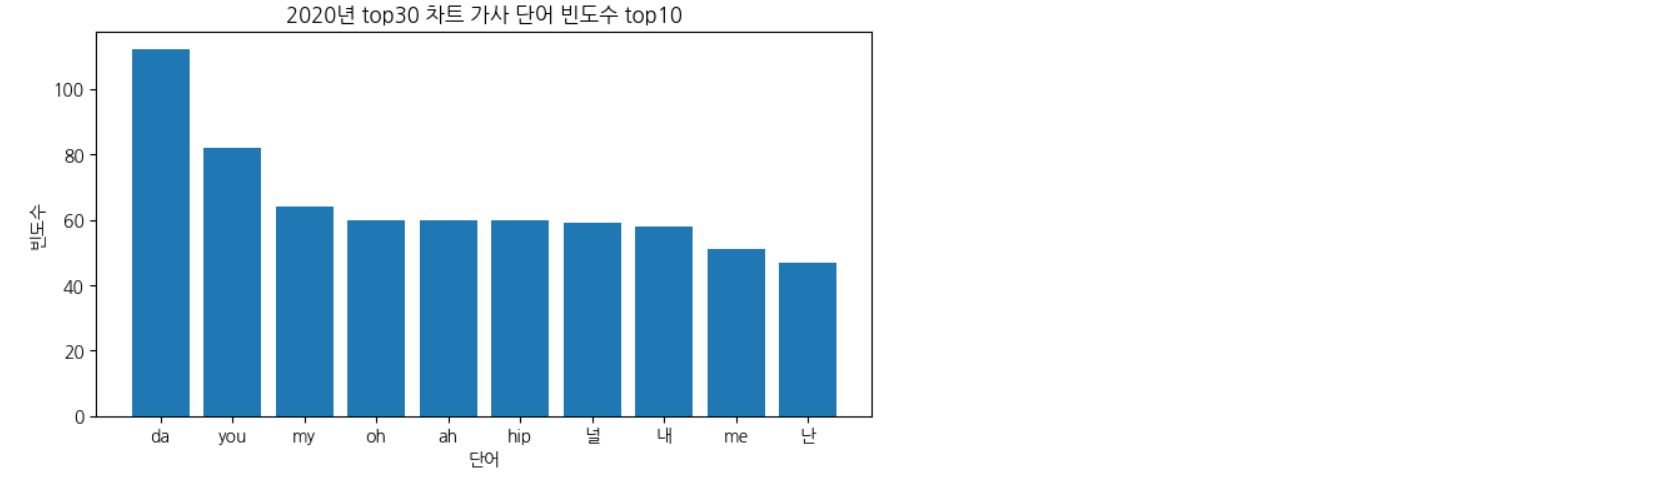

In [7]:
# ver2. DF로 만들어서 시각화
word_df=pd.DataFrame.from_dict(word_freq,orient='index').reset_index()
word_df.columns=['단어','빈도수']
word_df=word_df.sort_values('빈도수',ascending=False)
word_df.head()

,단어,빈도수
1983,da,112
156,you,82
52,my,64
804,ah,60
307,oh,60


In [ ]:
px.bar(word_df.head(10),x='단어',y='빈도수',text_auto=True)

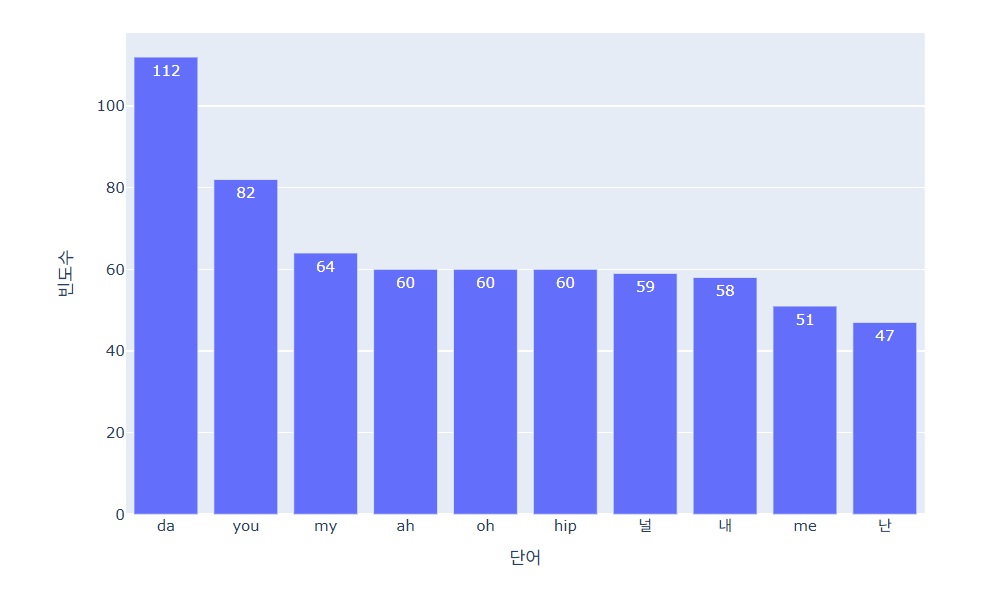